In [1]:
# AML Final Project (Predicting fake news from real news)
# name = pouya ahadpour bakhtiari
# bootcamp = 20
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/python/final_en.csv')

In [3]:
df.sample(50)

,title,text,lebel
9373,Republicans try to pick up the pieces after he...,WASHINGTON (Reuters) - The seven-year Republic...,1
164,"Nuclear, renewables to help French CO2 reducti...",PARIS (Reuters) - French President Emmanuel Ma...,1
720,Biden does not see Trump undoing much of envir...,OTTAWA (Reuters) - U.S. Vice President Joe Bid...,1
4754,WATCH: Trump Surrogate Tries To Defend Trump ...,It s a trap! That s the messaging that the T...,0
8223,ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...,Because there wouldn t be any outrage over a ...,0
4975,ANTI-TRUMP Communications Specialist For UN Ar...,A United Nations employee was busted for robbi...,0
327,The BRUTAL Truth About Why Kids Love Bernie Sa...,"At some point, most of us grow up and realize...",0
4270,"Rhetoric aside, Latin America leaders say Trum...",NEW YORK (Reuters) - U.S. President Donald Tru...,1
5498,BREAKING: MASSIVE CYBER ATTACK ON ALL FEDERAL ...,This data breach could affect every federal a...,0
1935,GERMANY CRISIS ESCALATES: Muslim Migrants Mast...,What a great place to take the whole family!We...,0


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   text    10000 non-null  object
 2   lebel   10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [6]:
df.nunique()

title    9711
text     9607
lebel       2
dtype: int64

In [7]:
df.duplicated().sum()

270

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

title    0
text     0
lebel    0
dtype: int64

In [11]:
df.isna().sum() / df.shape[0] * 100

title    0.0
text     0.0
lebel    0.0
dtype: float64

In [12]:
df.dropna(inplace=True)

In [13]:
df

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1
...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",0
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,1
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,1
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",0


In [14]:
from wordcloud import WordCloud, get_single_color_func, ImageColorGenerator
from wordcloud import STOPWORDS

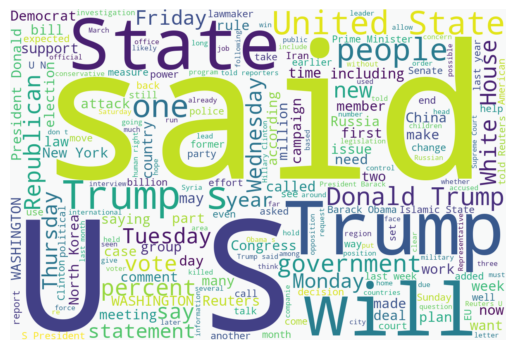

In [15]:
true_news = df[df['lebel'] == 1]
text = ' '.join(true_news['text'])
wcl = WordCloud(width=1200, height=800,
                background_color='#F8F9F9',
                min_font_size=5).generate(text)
plt.imshow(wcl, interpolation='bilinear')
plt.axis('off')
plt.show()

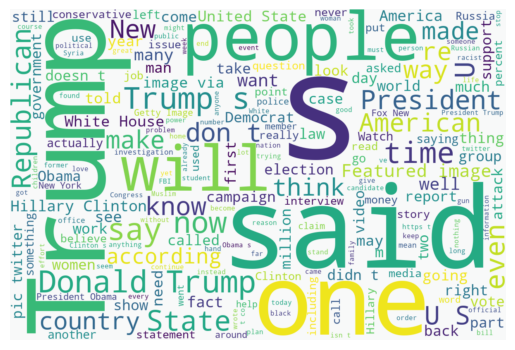

In [16]:
fake_news = df[df['lebel'] == 0]
text = ' '.join(fake_news['text'])
wcl = WordCloud(width=1200, height=800,
                background_color='#F8F9F9',
                min_font_size=5).generate(text)
plt.imshow(wcl, interpolation='bilinear')
plt.axis('off')
plt.show()

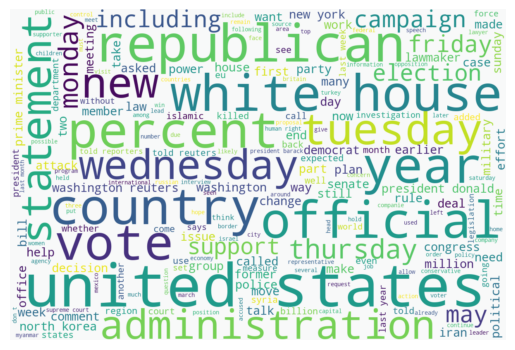

In [17]:
# Delete a series of words from WordCloud
true_news = df[df['lebel'] == 1]
text = ' '.join(true_news['text'])

my_stopwords = STOPWORDS.copy()
my_stopwords = my_stopwords.union({'US', 'United State', 'Trump', 'State', 'Donald Trump',
                                   'Said', 'S', 'said', 'united states', 'u','will','United State','United States'
                                  'country','UnitedStates','say','people','the','is','in','and','of','report','news'
                                  ,'Clinton','Obama','Russia','China','White House','American','North Korea','saying',
                                  'government','white house','one','One','according',''})
import string
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
wcl = WordCloud(width=1200, height=800,
                background_color='#F8F9F9',
                stopwords=my_stopwords,
                min_font_size=5).generate(text)
plt.imshow(wcl, interpolation='bilinear')
plt.axis('off')
plt.show()

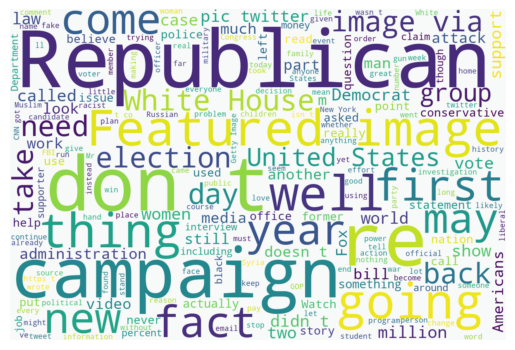

In [18]:
# Delete a series of words from WordCloud
fake_news = df[df['lebel'] == 0]
text = ' '.join(fake_news['text'])

my_stopwords = STOPWORDS.copy()
my_stopwords = my_stopwords.union({'US', 'United State', 'Trump', 'State', 'Donald Trump',
                                   'Said', 'S', 'said', 'united states', 'u','will','United State','United States',
                                  'country','Donald','now','say','one','President','people','UnitedStates','say',
                                   'people','the','is','in','and','of','report','news','Clinton','Obama','Russia',
                                   'China','White House','American','North Korea','saying','government','white house',
                                   'one','One','according','Hillary','even','America','know','way','go','says','time',
                                  'make','made','right','see','think','dont','told','want','Want','many'})
wcl = WordCloud(width=1200, height=800,
                background_color='#F8F9F9',
                stopwords=my_stopwords,
                min_font_size=5).generate(text)
plt.imshow(wcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, df['lebel'], test_size=0.25, random_state=42)

In [24]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7297, 12422) (7297,)
(2433, 12422) (2433,)


In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.neighbors import KNeighborsClassifier as KNN

In [26]:
clf1 = DTC(criterion='gini').fit(X_train,y_train)
clf2 = RFC(n_estimators=20,criterion='gini').fit(X_train,y_train)
clf3 = ABC(estimator=DTC(criterion='gini'),n_estimators=20).fit(X_train,y_train)
clf4 = BaggingClassifier(estimator=KNN(n_neighbors=7),n_estimators=20).fit(X_train,y_train)
clf5 = KNN(n_neighbors=5).fit(X_train,y_train)

In [27]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [28]:
print(accuracy_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.9001233045622689
0.9284833538840938
0.9017673653925196
0.8849157418824497
0.8697081792026305


In [29]:
print(precision_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.8997668997668997
0.9184451219512195
0.8994586233565351
0.8583815028901735
0.8408279800142755


In [30]:
print(recall_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.910377358490566
0.9473270440251572
0.914308176100629
0.9339622641509434
0.9261006289308176


In [31]:
print(f1_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.9050410316529893
0.9326625386996904
0.90682261208577
0.8945783132530121
0.881406659184437


In [32]:
best_model = clf2
y_pred_best = best_model.predict(X_test)

In [33]:
# increasing n_estimators
clf1 = DTC(criterion='gini').fit(X_train,y_train)
clf2 = RFC(n_estimators=50,criterion='gini').fit(X_train,y_train)
clf3 = ABC(estimator=DTC(criterion='gini'),n_estimators=50).fit(X_train,y_train)
clf4 = BaggingClassifier(estimator=KNN(n_neighbors=7),n_estimators=50).fit(X_train,y_train)
clf5 = KNN(n_neighbors=5).fit(X_train,y_train)

In [34]:
print(accuracy_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(accuracy_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.8951911220715166
0.9288943690916563
0.89724619810933
0.8816276202219482
0.8697081792026305


In [35]:
print(precision_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(precision_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.8932714617169374
0.9079435783221975
0.8930769230769231
0.8504273504273504
0.8408279800142755


In [36]:
print(recall_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(recall_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.9080188679245284
0.9614779874213837
0.9127358490566038
0.9386792452830188
0.9261006289308176


In [37]:
print(f1_score(y_true=y_test,y_pred=clf1.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf2.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf3.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf4.predict(X_test)))
print(f1_score(y_true=y_test,y_pred=clf5.predict(X_test)))

0.9005847953216375
0.9339442535318824
0.9027993779160187
0.8923766816143497
0.881406659184437


In [38]:
best_model = clf2
y_pred_best = best_model.predict(X_test)